##Without convolution
Test loss: 0.35327839851379395, Test accuracy: 87.30999827384949

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6358 - accuracy: 0.7780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3841 - accuracy: 0.8610
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8851
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3600 - accuracy: 0.8728
Test loss: 0.3600201904773712, Test accuracy: 87.27999925613403


##With convolution

In [14]:
import tensorflow as tf
print(tf.__version__)

#Gather the data - without reshape we will get an error
#because convolution can't recognize the shape
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

#The number of convolutions you want to generate. A value like 32 is a good starting point
#but here it's 64
#The size of the convolutional matrix, in this case a 3x3 grid.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  #Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
  tf.keras.layers.Flatten(),
  #The same 128 dense layers, and 10 output layers as in the pre-convolution example:
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
#Too many epochs can occur overfitting (too known for only the data we trained)
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

2.4.0
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16)        

##visualize the convolution and pooling

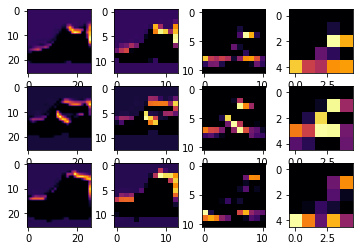

In [5]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 6
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

##Exercise
Exercise 1
- Try editing the convolutions. Change the number of convolutions from 32 to either 16 or 64. What impact does that have on accuracy and training time?
  - Conv 64:
    - training time 79s each
    - Test loss: 0.26993629336357117, Test accuracy: 90.64000248908997

  - Conv 32:
    - training time 42s each
    - Test loss: 0.2668800950050354, Test accuracy: 90.24999737739563

  - Conv 16:
    - training time 27s each
    - Test loss: 0.2899429500102997, Test accuracy: 89.4599974155426

Exercise 2
- Remove the final convolution. What impact does that have on accuracy or training time?

Exercise 3 (Overfitting)
- Add more convolutions. What impact does that have?
  - Conv 16:
    - training time 29s each
    - Test loss: 0.4209803640842438, Test accuracy: 84.64999794960022

Exercise 4
- Remove all convolutions but the first. What impact does that have? Experiment with it.
  - Conv 16:
    - training time 23s each
    - Test loss: 0.2527337074279785, Test accuracy: 91.46000146865845 